### 1. Simplify the problem

##### problem say,
##### $$ x_{(v_{0}, \theta, t)} = \frac{v_{0x}}{\gamma}(1 - e^{-\gamma t}) $$
##### $$ y_{(v_{0}, \theta, t)} = (\frac{v_{0y}}{\gamma} + \frac{g}{\gamma^{2}})(1 - e^{-\gamma t}) - \frac{g}{\gamma}t$$

$$ g = 9.81m/s^{2}, \ \gamma = 0.01v_{0}  $$ 

##### and find $ v_{0}, \theta, t $ where projectile reaches point $ A (x = 300, y = 61)$ with $ 45\degree $.

##### problem provide the condition $ \frac{\partial x}{\partial t} = -\frac{\partial y}{\partial t} $ since at point A, projectile is $45\degree$

##### also we already know $ v_{0x} = v_{0}\cos\theta, v_{0y} = v_{0}\sin\theta $

##### eventually we have to solve the problem where,

##### $$ f_{1(v_{0}, \theta, t)} = x_{(v_{0}, \theta, t)} - 300 = 0 $$
##### $$ f_{2(v_{0}, \theta, t)} = y_{(v_{0}, \theta, t)} - 61 = 0 $$
##### $$ f_{3(v_{0}, \theta, t)} = \frac{\partial x_{(v_{0}, \theta, t)}}{\partial t} + \frac{\partial y_{(v_{0}, \theta, t)}}{\partial t} = 0 $$

### 2. Define functions to solve problems

##### applying $g = 9.81m/s^{2}, \gamma = 0.01s^{-1}, v_{0x} = v_{0}\cos\theta, v_{0y} = v_{0}\sin\theta $ to $x, y, f$, 
##### they becomes

##### $$ x_{(v_{0}, \theta, t)} = \frac{v_{0}\cos\theta}{0.01}(1 - e^{-0.01t}) = 100v_{0}\cos\theta(1 - e^{-0.01t}) $$

#### $$ y_{(v_{0}, \theta, t)} = (\frac{v_{0}\sin\theta}{0.01} + \frac{9.81}{(0.01)^{2}})(1 - e^{-0.01t}) - \frac{9.81}{0.01}t $$

#### $$ = (100v_{0}\sin\theta + \frac{9.81}{(0.01)^2})(1 - e^{-0.01t}) - 981t $$

#### $$ \frac{\partial x}{\partial t} = v_{0} \cos\theta e^{-0.01t} $$

#### $$ \frac{\partial y}{\partial t} = (v_{0}\sin\theta + 981)e^{-0.01t} - 981 $$


#### Eventually,
#### $$ f_{1(v_{0}, \theta, t)} = 100v_{0}\cos\theta(1 - e^{-0.01t}) - 300 = 0 $$
#### $$ f_{2(v_{0}, \theta, t)} = (100v_{0}\sin\theta + \frac{9.81}{(0.01)^2})(1 - e^{-0.01t}) - 981t - 61 = 0 $$
#### $$ f_{3(v_{0}, \theta, t)} = v_{0} \cos\theta e^{-0.01t} + (v_{0}\sin\theta + 981)e^{-0.01t} - 981 = 0 $$

##### Now we can use Newton-Raphson method

### 3. Solve problem

In [1]:
# define Newton-Rapshon method
# use np.linalg.solve 

import numpy as np
from time import time

def NewtonRaphson(func : list, x_init=None, increment=1.0e-4, tol=1.0e-9, max_iter=100) : 
    import numpy as np
    from math import sqrt
    from time import time

    n = len(func)
    if x_init is None : 
        x_init = np.zeros((n), dtype=float).flatten()
        for i in range(n) : 
            x_init[i] = 1
    elif len(x_init) != n : 
        print("x_init must be same dimensions with func")
        return None, None, None
    elif type(x_init) == type(list()) : 
        x_init = np.array(x_init, dtype=float)
    else : 
        x_init = x_init.astype(dtype=float)

    iter = 0
    compute_time = time()
    while True : 
        # print("x_init", x_init, sep="\n")
        Jacobian = np.zeros((n,n), dtype=float)
        f_x = np.zeros(x_init.shape, dtype=float)

        for i in range(n) : 
            fi = func[i]

            for j in range(n) : 
                step = np.zeros(x_init.shape, dtype=float)
                step[j] = increment
                Jacobian[i, j] = (fi(*(x_init + step)) - fi(*x_init)) / increment
            
            f_x[i] = -1 * fi(*x_init)

        # if sqrt(abs(max(f_x) * max(f_x))) <= tol : 
        #     compute_time = time() - compute_time
        #     break
        
        # print("jaco", Jacobian, sep="\n")
        # print("fx", f_x, sep="\n")
        del_x = np.linalg.solve(Jacobian, f_x)

        if sqrt(abs(del_x.T @ del_x)) <= tol : 
            compute_time = time() - compute_time
            break
        else : 
            x_init += del_x
            # print("del_x", del_x, sep="\n")
            # print()
        
        if iter >= max_iter : 
            print("Failed to converge.")
            return None, iter, time() - compute_time
        
        iter += 1

    return x_init, iter, compute_time

In [2]:
import numpy as np
from numpy import cos, sin, exp

def f1(v0, theta, t) : 
    return 100 * v0 * cos(theta) * (1 - exp(-0.01 * t)) - 300

def f2(v0, theta, t) : 
    return (100 * v0 * sin(theta) + 9.81 / (0.01**2)) * (1 - exp(-0.01 * t)) - 981 * t - 61

def f3(v0, theta, t) : 
    return v0 * cos(theta) * exp(-0.01 * t) + (v0 * sin(theta) + 981) * exp(-0.01 * t) - 981

In [3]:
solution, iter, compute_time = NewtonRaphson(func=[f1, f2, f3], max_iter=10000, x_init=[60, 54 * np.pi / 180, 8])

print("v0 : ", solution[0])
print("theta (degree) : ", (solution[1] * 180 / np.pi) % 360)
print("time : ", solution[2])
print(iter)

v0 = solution[0]
theta = solution[1]
t = solution[2]

print(f1(v0=v0, theta=theta, t=t))
print(f2(v0=v0, theta=theta, t=t))
print(f3(v0=v0, theta=theta, t=t))

v0 :  61.868661764823806
theta (degree) :  53.28131809236353
time :  8.458019157908735
3
2.188698999816552e-09
3.1850504456087947e-09
6.164100341266021e-10


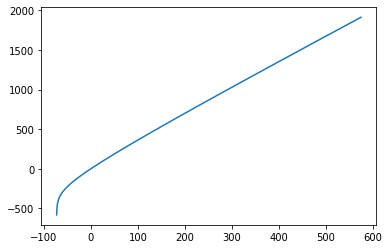

In [55]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10)
plt.plot(f1(v0, theta, t), f2(v0, theta, t))
plt.show()